In [146]:
"""import libraries"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [170]:
df = pd.read_csv("sf_data.csv")#,sep=',',index_col="Date",parse_dates=True)
df.index = df['Date']
df['mwe_total'] = df['Unit1'] + df['Unit2']
df['sf_total'] = df['701'] + df['702']
df['sf_bo_total'] = df['701'] + df['702'] + df['701a'] + df['702a'] + df['701b'] + df['702b'] + \
                    df['701c'] + df['702c']
df['bo_total'] = df['701a'] + df['702a'] + df['701b'] + df['702b'] + df['701c'] + df['702c']
df['pad_e'] = df['301-302'] + df['303_304'] + df['305_306']
df['pad_hf'] = df['401_402'] + df['403_404'] + df['405']
df['sf_prs'] = df['pad_e'] + df['pad_hf'] + df['508']
df['diff_prs_if'] = df['sf_prs'] - df['sf_total']
df['diff_prs_bo'] = df['sf_prs'] - df['sf_bo_total']
df['pdiff_prs_if'] = 100 * (df['sf_prs'] - df['sf_total'])/df['sf_total']
df['pdiff_prs_bo'] = 100 * (df['sf_prs'] - df['sf_bo_total'])/df['sf_bo_total']
df['bom_wellhead'] = 1008.2
df['pdiff_bom_if'] = 100 * (df['bom_wellhead'] - df['sf_total'])/df['sf_total']
df['pdiff_bom_bo'] = 100 * (df['bom_wellhead'] - df['sf_bo_total'])/df['sf_bo_total']
df['bom_if'] = 977.95
df['bom_pad_e'] = 418.68
df['bom_pad_hf'] = 510.12
df['bom_pad_c'] = 79.2

In [178]:
def get_data(dates, full_df, cols):
    """create a df with the specified date range and variables to plot"""
    #Create a dataframe with the given date range as index
    df = pd.DataFrame(index=dates)
    #Read the WHP data from the .csv file
    df_temp = full_df[cols]
    #Join the given date_range data frame with the imported whp dataframe                    
    df = df.join(df_temp)
    return df

def plot_data(df, ylabel, title):
    #Define size of the plot
    matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
    """Plot stock WHP with a custom title and axis labels"""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date", fontsize=16)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.grid(True)
    plt.xticks(rotation='vertical')
    plt.show()
    
def nan_outlier(group, stds):
    """This function will replace outlier with nan; use 1sd:68% 1.96sd:95% 3sd:99%"""
    pd.options.mode.chained_assignment = None  # default='warn'
    group[np.abs(group - group.mean()) > stds * group.std()] = np.nan
    return group

In [149]:
"""Define Date Range Here"""
start_date = '2016-08-16 00:00:00'      
end_date = '2016-08-26 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')
%matplotlib inline
title = ""
yl_sf = "Steam Flow (TPH)"
yl_mwe = "MWe"
yl_diff = "% Difference"

## Generation (MWe)

             Unit1        Unit2
count  1584.000000  1584.000000
mean     57.822726    58.097423
std       3.745581     1.147278
min      29.869999    25.180000
25%      58.070000    57.820000
50%      58.369999    58.189999
75%      58.692498    58.492498
max      59.570000    59.259998


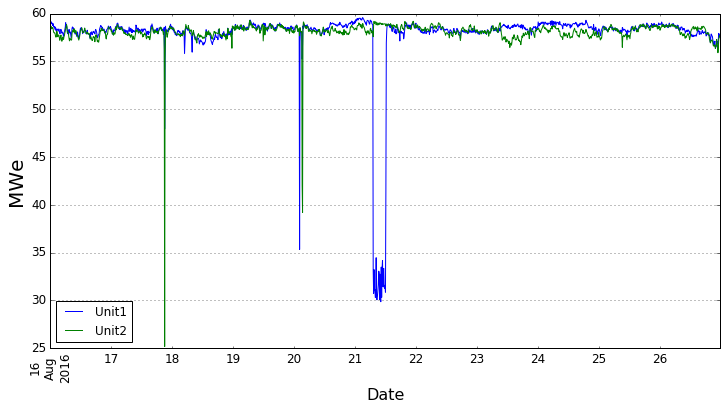

In [150]:
variables = ['Date', 'Unit1', 'Unit2']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_mwe, title)

## Steam Supplied (TPH)

               701          702
count  1584.000000  1584.000000
mean    473.914685   485.007697
std      29.368752     7.707823
min     250.279343   261.894806
25%     475.223152   483.428940
50%     478.117386   485.459259
75%     480.721573   487.314934
max     487.912781   491.496704


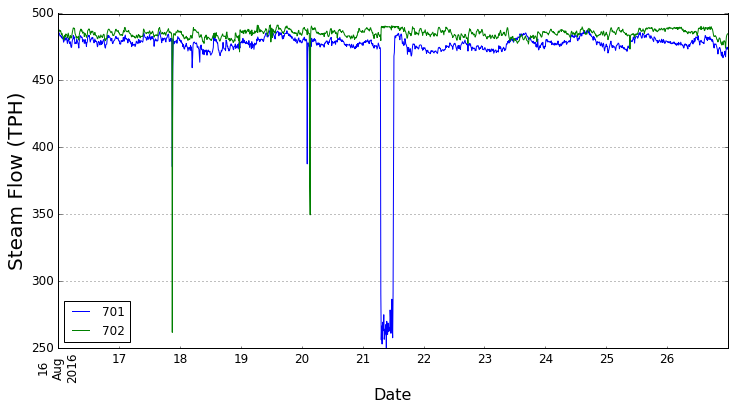

In [151]:
variables = ['Date', '701', '702']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Steam Flow Data (Interface, w/ Blow-off, PRS)

       bom_wellhead       sf_prs  sf_bo_total     sf_total
count  1.584000e+03  1584.000000  1584.000000  1584.000000
mean   1.008200e+03   986.430719   972.206404   958.922382
std    2.854441e-11    16.660898    13.428380    30.446257
min    1.008200e+03   904.939674   894.762775   647.514862
25%    1.008200e+03   977.825679   965.843446   959.394379
50%    1.008200e+03   986.749216   970.393553   963.252975
75%    1.008200e+03   994.942985   975.304077   967.225662
max    1.008200e+03  1077.142349  1141.960791   979.311005


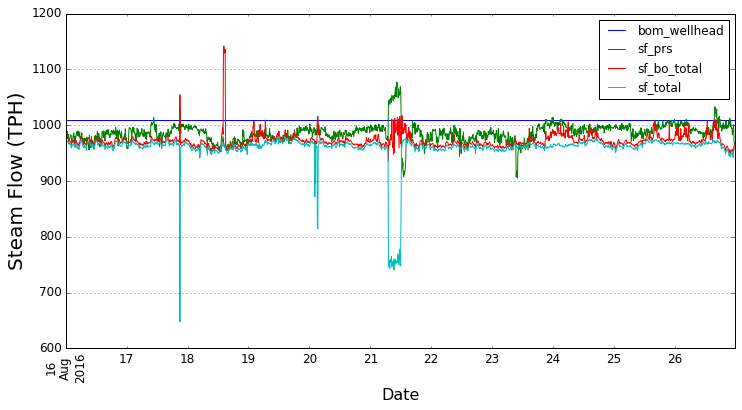

In [152]:
variables = ['Date', 'bom_wellhead', 'sf_prs', 'sf_bo_total', 'sf_total']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)
#df_temp.corr()

## Do we still have blow-off?

          bo_total
count  1584.000000
mean     13.284022
std      34.003850
min       5.885265
25%       5.999758
50%       6.027830
75%       6.065907
max     406.885310


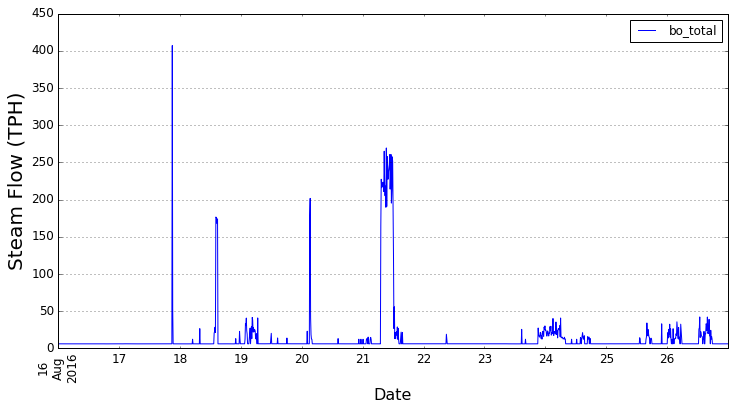

In [166]:
variables = ['Date', 'bo_total']
df_temp = get_data(dates, df, variables)
#nan_outlier(df_temp['bo_total'], 1.96)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Percent Difference in Steam Flow Measurement (PRS vs Interface; PRS vs Interface + Blow Off)

       pdiff_prs_if  pdiff_prs_bo  pdiff_bom_if  pdiff_bom_bo
count   1584.000000   1584.000000   1584.000000   1584.000000
mean       3.036701      1.477150      5.272628      3.720580
std        5.519125      1.947979      4.224394      1.331095
min       -6.821984    -15.580253      2.949931    -11.713256
25%        1.442817      0.627823      4.236275      3.372889
50%        2.375523      1.569043      4.666170      3.895991
75%        3.291115      2.400283      5.087128      4.385447
max       59.317167     11.181747     55.702990     12.677911


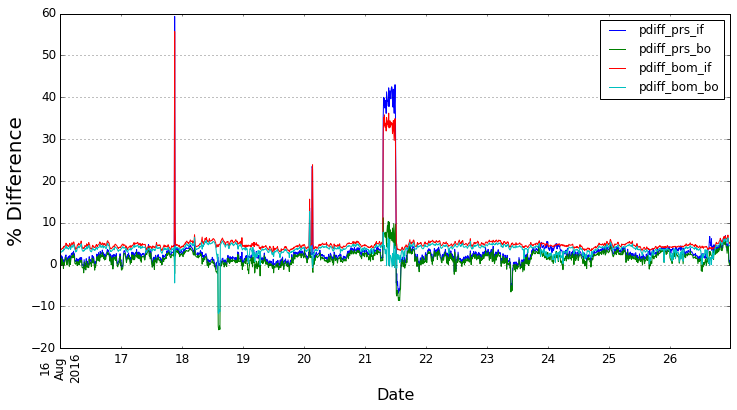

In [173]:
variables = ['Date', 'pdiff_prs_if', 'pdiff_prs_bo', 'pdiff_bom_if', 'pdiff_bom_bo']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_diff, title)

## Remove Outliers (Outside 1.96*SD)

       pdiff_prs_if  pdiff_prs_bo  pdiff_bom_if  pdiff_bom_bo
count   1550.000000   1532.000000   1549.000000   1540.000000
mean       2.262043      1.491176      4.660076      3.834529
std        1.485823      1.227095      0.633267      0.835398
min       -6.821984     -2.320005      2.949931      1.205732
25%        1.408372      0.650826      4.227947      3.419774
50%        2.335952      1.555449      4.642511      3.924861
75%        3.228350      2.369590      5.054373      4.389114
max       13.519804      5.224146     10.230642      6.182408


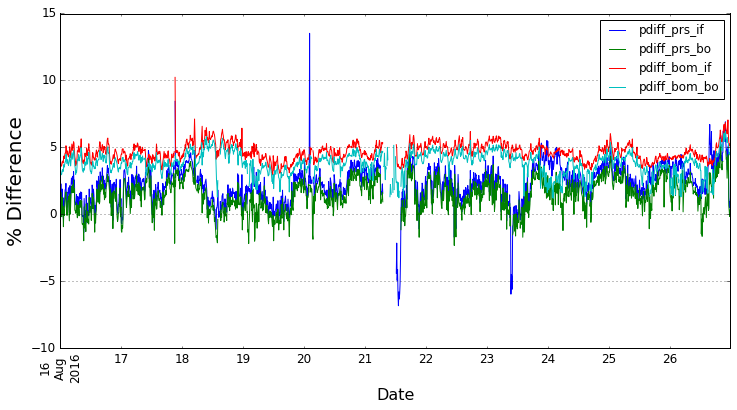

In [172]:
variables = ['Date', 'pdiff_prs_if', 'pdiff_prs_bo', 'pdiff_bom_if', 'pdiff_bom_bo']
df_temp = get_data(dates, df, variables)
nan_outlier(df_temp['pdiff_prs_if'], 1.96)
nan_outlier(df_temp['pdiff_prs_bo'], 1.96)
nan_outlier(df_temp['pdiff_bom_if'], 1.96)
nan_outlier(df_temp['pdiff_bom_bo'], 1.96)
print df_temp.describe()
plot_data(df_temp, yl_diff, title)

## Histogram of % difference in steam flow measurement from PRS to Interface (with Blow-Off)

count    1548.000000
mean        1.534837
std         1.313487
min        -2.695107
25%         0.656181
50%         1.569883
75%         2.385998
max         7.296205
Name: pdiff_prs_bo, dtype: float64


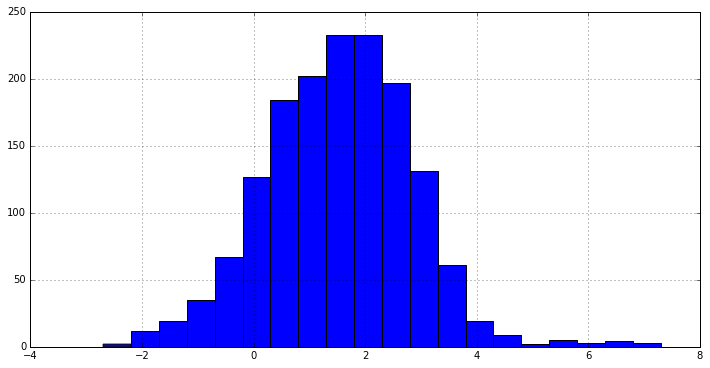

In [175]:
variables = ['Date', 'pdiff_prs_if', 'pdiff_prs_bo', 'pdiff_bom_bo']
df_temp = get_data(dates, df, variables)
std = df_temp['pdiff_prs_bo'].std()     #calculate standard deviation
nan_outlier(df_temp['pdiff_prs_bo'], 3)
df_temp['pdiff_prs_bo'].hist(bins=20)
print df_temp['pdiff_prs_bo'].describe()

## Histogram of % difference in steam flow measurement from BOM to Interface (with Blow-Off)

count    1571.000000
mean        3.779145
std         0.949009
min        -0.259204
25%         3.391277
50%         3.903909
75%         4.386317
max         6.447254
Name: pdiff_bom_bo, dtype: float64


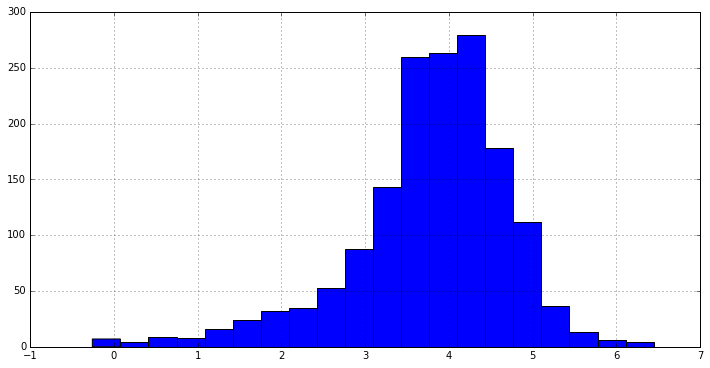

In [177]:
variables = ['Date', 'pdiff_prs_if', 'pdiff_prs_bo', 'pdiff_bom_bo']
df_temp = get_data(dates, df, variables)
nan_outlier(df_temp['pdiff_bom_bo'], 3)
df_temp['pdiff_bom_bo'].hist(bins=20)
print df_temp['pdiff_bom_bo'].describe()